In [91]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# File to Load (Remember to Change These)
restaurant_data = "Data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv"
#rat_data = "Rat_Sightings.csv"

restaurant_data = pd.read_csv(restaurant_data)
#rat_data = pd.read_csv(rat_data)

restaurant_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [92]:
# Get the number of critical violations each restaurant has received

restaurant_data_1 = restaurant_data.loc[restaurant_data["CRITICAL FLAG"] == "Critical",:]
critical_violations_count = restaurant_data_1.groupby(restaurant_data_1["CAMIS"]).count()["CRITICAL FLAG"]

critical_violations_count.head()

CAMIS
30075445     3
30112340    13
30191841     7
40356018     2
40356151     8
Name: CRITICAL FLAG, dtype: int64

In [93]:
sorted_restaurant_data = restaurant_data_1.sort_values("INSPECTION DATE")
sorted_restaurant_data = sorted_restaurant_data.drop_duplicates(subset = "CAMIS", keep = "last")
sorted_restaurant_data = sorted_restaurant_data[["CAMIS","DBA","BORO","BUILDING","STREET","ZIPCODE","CUISINE DESCRIPTION","GRADE","GRADE DATE"]]
sorted_restaurant_data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,GRADE,GRADE DATE
211966,50057961,Sunnyside Taco,QUEENS,4222,GREENPOINT AVE,11104.0,Mexican,A,01/03/2017
118053,50056895,MAXWELLS CHOPHOUSE NY,MANHATTAN,1182,BROADWAY,10001.0,American,A,01/03/2017
253465,50057019,PARIS BAGUETTE,QUEENS,4522,46TH ST,11104.0,Bakery,A,01/03/2017
220854,50057566,DOMINO'S,QUEENS,24722D,S CONDUIT AVE,11422.0,Pizza,NaN,NaN
273148,50050701,FREDERICK SOUL HOLE,QUEENS,23316A,MERRICK BLVD,11422.0,Soul Food,A,01/03/2017
...,...,...,...,...,...,...,...,...,...
261534,41684056,LA MAISON DU CROQUE MONSIEUR,MANHATTAN,17,EAST 13 STREET,10003.0,French,NaN,NaN
89109,40545741,BOB'S STEAK & CHOP HOUSE,MANHATTAN,21,EAST 52 STREET,10022.0,American,NaN,NaN
177401,40367789,DANI PIZZA AND RESTAURANT,QUEENS,8128,LEFFERTS BOULEVARD,11415.0,Pizza,NaN,NaN
18414,41339289,THE GOOD FORK,BROOKLYN,391,VAN BRUNT STREET,11231.0,American,A,12/31/2016


In [94]:
restaurant_summary = pd.merge(sorted_restaurant_data,critical_violations_count,how = "left", on = ["CAMIS","CAMIS"])
restaurant_summary = restaurant_summary.rename(columns  = {"CRITICAL FLAG":"Count of Violations"})


In [95]:
Rat_Sightings = pd.read_csv("Data/Rat_Sightings.csv")
Rat_Sightings = Rat_Sightings.rename(columns  = {"Incident Zip":"ZIPCODE"})
Rat_Sightings.head()

,ZIPCODE,Rat Sightings
0,10000.0,3
1,10001.0,383
2,10002.0,1299
3,10003.0,627
4,10004.0,40


In [96]:
#need to clear NA's out of violations, rat sightings, Grade
restaurant_summary = pd.merge(restaurant_summary,Rat_Sightings,how = "left", on = ["ZIPCODE","ZIPCODE"])

#restaurant_summary.sort_values(by = "Rat Sightings",ascending = False).head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,GRADE,GRADE DATE,Count of Violations,Rat Sightings
24528,41504405,ECUA POLLOS DELI RESTAURANT,BROOKLYN,1262,MYRTLE AVENUE,11221.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",NaN,NaN,24,3124.0
6842,41371323,HO MEI CHINESE RESTAURANT,BROOKLYN,222,MALCOM X BOULEVARD,11221.0,Chinese,A,08/07/2014,5,3124.0
19100,50045371,THE WILKY,BROOKLYN,108,PATCHEN AVE,11221.0,American,A,12/07/2016,2,3124.0
15992,50044839,THE GATEWAY,BROOKLYN,1272,BROADWAY,11221.0,American,A,11/15/2016,2,3124.0
15609,50004991,KAVA SHTEEBLE,BROOKLYN,94,RALPH AVE,11221.0,CafÃ©/Coffee/Tea,A,11/12/2014,9,3124.0


In [106]:
#Boro table
boro = restaurant_summary[["BORO","Rat Sightings","Count of Violations"]]

boro_rats = boro.groupby("BORO")["Rat Sightings"].sum()
boro_rats = boro_rats.reset_index()
boro_rats = boro_rats.sort_values(by = "Rat Sightings",ascending = False)

boro_vio = boro.groupby("BORO")["Count of Violations"].sum()
boro_vio = boro_vio.reset_index()
boro_vio = boro_vio.sort_values(by = "Count of Violations",ascending = False)
boro_rats

,BORO,Rat Sightings
2,MANHATTAN,6171345.0
1,BROOKLYN,5869999.0
0,BRONX,2147226.0
3,QUEENS,2030217.0
4,STATEN ISLAND,419928.0


In [105]:
#cuisine table
cuisine = restaurant_summary[["CUISINE DESCRIPTION","Rat Sightings","Count of Violations"]]

cuisine_rats = cuisine.groupby("CUISINE DESCRIPTION")["Rat Sightings"].sum()
cuisine_rats = cuisine_rats.reset_index()
cuisine_rats = cuisine_rats.sort_values(by = "Rat Sightings",ascending = False)

cuisine_vio = cuisine.groupby("CUISINE DESCRIPTION")["Count of Violations"].sum()
cuisine_vio = cuisine_vio.reset_index()
cuisine_vio = cuisine_vio.sort_values(by = "Count of Violations",ascending = False)


In [99]:
grade = restaurant_summary[["GRADE","Rat Sightings","Count of Violations"]]
grade = grade.dropna(subset=["GRADE"])

grade_rat = grade.groupby("GRADE")["Rat Sightings"].sum()
grade_rat = grade_rat.reset_index()

grade_vio = grade.groupby("GRADE")["Count of Violations"].sum()
grade_vio = grade_vio.reset_index()

Text(0.5, 0, 'Grade')

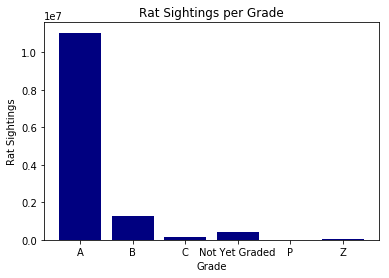

In [61]:
plt.bar(grade_rat["GRADE"],grade_rat["Rat Sightings"],align = "center", color = "navy")
plt.title("Rat Sightings per Grade")
plt.ylabel("Rat Sightings")
plt.xlabel("Grade")
#plt.yticks(np.arange(0, 5000, step=50))

Text(0.5, 0, 'Grade')

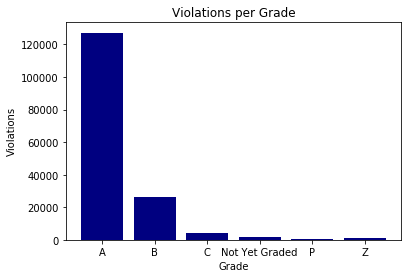

In [62]:
plt.bar(grade_vio["GRADE"],grade_vio["Count of Violations"],align = "center", color = "navy")
plt.title("Violations per Grade")
plt.ylabel("Violations")
plt.xlabel("Grade")

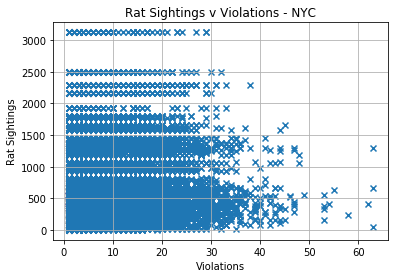

In [63]:
#total data 
plt.scatter(restaurant_summary["Count of Violations"],restaurant_summary["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - NYC")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

In [64]:
#DF filtered by boro
restaurant_summary_bk = restaurant_summary[restaurant_summary["BORO"] == "BROOKLYN"]
restaurant_summary_qu = restaurant_summary[restaurant_summary["BORO"] == "QUEENS"]
restaurant_summary_bx = restaurant_summary[restaurant_summary["BORO"] == "BRONX"]
restaurant_summary_si = restaurant_summary[restaurant_summary["BORO"] == "STATEN ISLAND"]
restaurant_summary_mh = restaurant_summary[restaurant_summary["BORO"] == "MANHATTAN"]

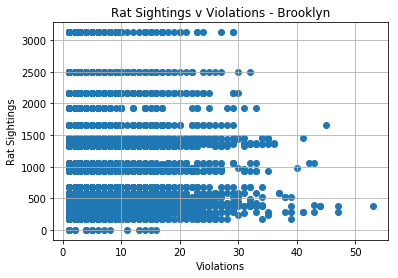

In [65]:
plt.scatter(restaurant_summary_bk["Count of Violations"],restaurant_summary_bk["Rat Sightings"],marker = "o")
plt.title("Rat Sightings v Violations - Brooklyn")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

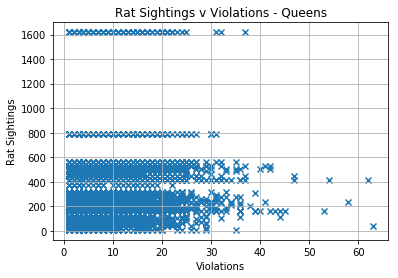

In [66]:
plt.scatter(restaurant_summary_qu["Count of Violations"],restaurant_summary_qu["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Queens")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

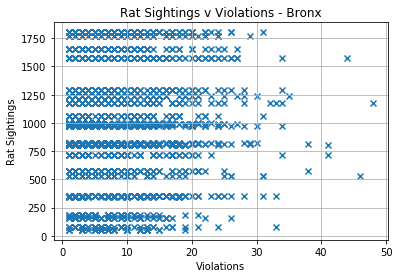

In [67]:
plt.scatter(restaurant_summary_bx["Count of Violations"],restaurant_summary_bx["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Bronx")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

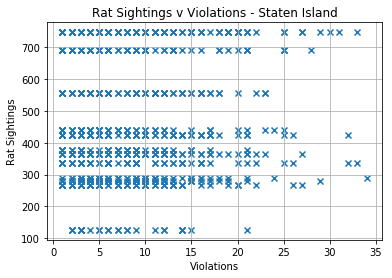

In [68]:
plt.scatter(restaurant_summary_si["Count of Violations"],restaurant_summary_si["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Staten Island")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

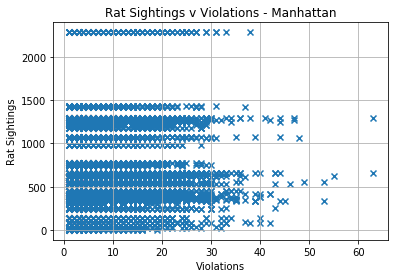

In [69]:
plt.scatter(restaurant_summary_mh["Count of Violations"],restaurant_summary_mh["Rat Sightings"],marker = "x")
plt.title("Rat Sightings v Violations - Manhattan")
plt.xlabel("Violations")
plt.ylabel("Rat Sightings")
plt.grid(True)

In [107]:
#algorithm

#Grade Value

#def GradeValue():
#    if restaurant_summary['GRADE'] == "A":
#        val = 3
#   elif restaurant_summary['GRADE'] == "B":
#        val = 2
#    elif restaurant_summary['GRADE'] == "C":
#        val = 1
#    elif restaurant_summary['GRADE'] == "Not Yet Graded":
#        val = 1
#    elif restaurant_summary['GRADE'] == "Z":
#        val = 1
#    elif restaurant_summary['GRADE'] == "P":
#        val = 1
#    else:
#        val = 0
#    return val

#restaurant_summary['Grade Value'] = restaurant_summary.apply(GradeValue())



restaurant_summary["Grade Value"] = 0
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "A"] = 3
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "B"] = 2
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "C"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "Z"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "Not Yet Graded"] = 1
restaurant_summary["Grade Value"][restaurant_summary["GRADE"] == "P"] = 0

#Rat Sightings Value

rat_bin = [0.0,100.0,250.0,500.0,1000.0,2000.0,5000.0]
rat_grade = ["5","4","3","2","1","0"]

restaurant_summary["RT Value"] = pd.cut(restaurant_summary["Rat Sightings"],rat_bin, labels = rat_grade)

#Violations Value

vio_bin = [0,2,5,10,20,30,100]
vio_grade = ["5","4","3","2","1","0"]

restaurant_summary["Vio Value"] = pd.cut(restaurant_summary["Count of Violations"],vio_bin, labels = vio_grade)

restaurant_summary = restaurant_summary.astype({'Vio Value': 'int32'})
restaurant_summary.astype({'RT Value': 'int32'}).dtypes

restaurant_summary["Grade(%)"] = (restaurant_summary["Grade Value"] + restaurant_summary["RT Value"] + restaurant_summary["Vio Value"])/13


restaurant_summary

/Users/crobinson1205/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/crobinson1205/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/crobinson1205/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/crobinson1205/anaconda3/lib/python3.7/site-packa

ValueError: cannot convert float NaN to integer

In [ ]:
# restaurant_data_2 = pd.DataFrame(critical_violations_count)
#restaurant_data_2 = rest
#restaurant_data_2 = restaurant_data_2.reset_index()
#restaurant_data_2 = restaurant_data_2.sort_values(by = ["CRITICAL FLAG"], ascending = False)
#restaurant_data_2 = restaurant_data_2.drop_duplicates(["CAMIS"])
# len(restaurant_data_2)

# restaurant_data_2 = restaurant_data_1.sort_values(by= ,ascending = False)
# restaurant_data_2 = restaurant_data_2.drop_duplicates(["CAMIS"])

# restaurant_data_3 = pd.merge(restaurant_data_1,restaurant_data_2, on = "CAMIS")
# restaurant_data_3 = restaurant_data_3.drop_duplicates(["CAMIS"])